# Airline Company Satisfaction Logistic Regression

## Step 1: Imports

In [1]:
# Standard operational package imports.
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

In [3]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [4]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Check the number of satisfied customers in the dataset

In [5]:
df_original["satisfaction"].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [6]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Drop the rows with missing values

In [7]:
df_subset=df_original.dropna(axis=0)
df_subset.reset_index(drop=True)
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Prepare the data

For creating a plot (`sns.regplot`) of the model to visualize results, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object."

In [8]:
df_subset.astype({"Inflight entertainment":float})
df_subset["Inflight entertainment"]

0         4
1         2
2         0
3         4
4         3
         ..
129875    5
129876    1
129877    2
129878    2
129879    3
Name: Inflight entertainment, Length: 129487, dtype: int64

### Convert the categorical column `satisfaction` into numeric

In [9]:
encoder=OneHotEncoder(drop="first")
encoded_data=encoder.fit_transform(df_subset[["satisfaction"]])
encoded_data.toarray()
df_subset[["satisfaction"]]=encoded_data.toarray()
df_subset

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0.0,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0.0,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0.0,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


### Create the training and testing data

In [10]:
X=df_subset[["Inflight entertainment"]]
y=df_subset["satisfaction"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Model building

### Fit a LogisticRegression model to the data

In [11]:
clf=LogisticRegression().fit(X_train, y_train)

### Obtain parameter estimates

In [12]:
clf.coef_

array([[0.99751462]])

In [13]:
clf.intercept_

array([-3.19355406])

### Create a plot of your model

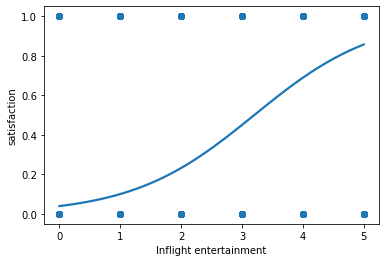

In [14]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

In [15]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

### Use the `predict_proba` and `predict` functions on `X_test`

In [16]:
# Use predict_proba to output a probability.
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

In [17]:
# Use predict to output 0's and 1's.
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

### Analyze the results

In [18]:
print("Accuracy score is " + "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision score is " "%.6f" % metrics.precision_score(y_test, y_pred))
print("F1 score is " "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy score is 0.801529
Precision score is 0.816142
F1 score is 0.818827


### Produce a confusion matrix

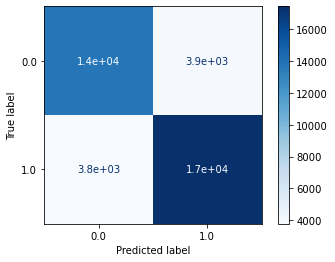

In [19]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Step 5. Conclusions
- Logistic regression accurately predicted satisfaction 80.2 percent of the time.
- The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.
- Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction.
- The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.